## Assignment 10

In this assignment, you will get an on-hand experience of utilizing PCA as a dimensionality reduction tool to extract features. 

Specifically,

1. Load the digits data from sklearn.

2. Perform a PCA on the dataset **without** specifying `n_components` and which direction is the main principal component? Namely, along the direction, the variance of sample points is the largest.

3. Compute the cumulative variance ratio of all the components. If we request that the PCA method should preserve at least 50% of the total variance, what is the minimum number of principal components?

4. Choose the best number ($N$) of components by cross-validation. In order to achieve it,first you need to apply the PCA with different $N$ to transform the image data. Then, you are required to apply the logistic regression to do the classification with transformed data as $X$ and the corresponding labels as $Y$. Finally, you can do the cross validation for each $N$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [2]:
 #1.
digits = load_digits()
data = digits.data
labels = digits.target

In [3]:
 #2.
pca = PCA().fit(data)
print(pca.explained_variance_)

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30]


In [4]:
max(pca.explained_variance_)

179.00693009797155

In [5]:
pca.components_[0]

array([-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, -1.35913304e-01,
       -3.30323092e-02, -9.66340844e-02, -8.32943805e-03,  2.26900082e-03,
       -3.20516495e-04, -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
       -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,  4.47779518e-03,
       -4.94136398e-05, -7.95419375e-02,  8.33951454e-02,  2.15915342e-01,
       -1.72126801e-01, -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
        9.85488574e-05,  6.42319144e-02,  2.54093316e-01, -3.56771026e-02,
       -2.09462569e-01, -4.31311420e-02,  5.13118688e-02,  2.13422732e-04,
       -0.00000000e+00,  1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
        8.52007908e-02,  3.72982855e-02,  2.15866980e-02, -0.00000000e+00,
        1.28865585e-03,  1.06945287e-01,  3.03067457e-01,  2.47813041e-01,
        2.09637296e-01,  1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
        6.93023548e-04, -8.35144239e-03, -5.58598986e-02,  9.30534169e-02,
        1.07387720e-01, -

In [6]:
 #3.
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [7]:
#4
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
sns.set()

In [8]:
pca = PCA()
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=1)
n = data.shape[1]
for i in range(1, n+1):
    X_reduced_train = pca.fit_transform(scale(X_train))[:, :i] 

from sklearn import linear_model
logistic = linear_model.LogisticRegression(max_iter=5000)
logistic.fit(X_reduced_train, y_train)

LogisticRegression(max_iter=5000)

Text(0, 0.5, 'MSE')

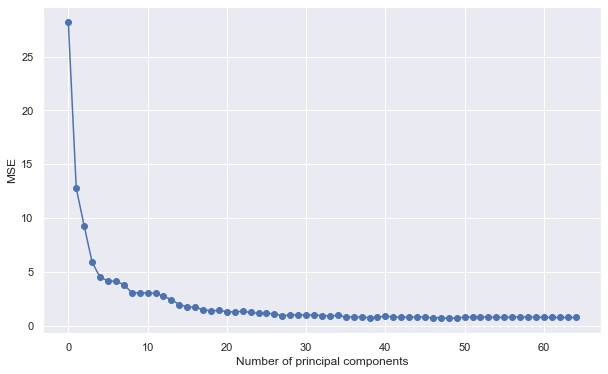

In [9]:
mse = []
# 10-fold cv
score = -cross_val_score(logistic, 
    np.ones((len(X_reduced_train), 1)), y_train,
    cv=10, scoring='neg_mean_squared_error')

mse.append(score.mean())

# Calculate MSE using cv for the 13 components, adding one at a time
for i in range(1, n+1):
    score = -cross_val_score(logistic, X_reduced_train[:, :i], y_train, cv=10, scoring='neg_mean_squared_error')
    mse.append(score.mean())

# Plot results
plt.figure(figsize=(10,6))
plt.plot(mse, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')

In [10]:
a = []
for i in range(1, n+1):
    X_reduced_test = pca.transform(scale(X_test))[:, :i]
    logistic.fit(X_reduced_train[:, :i], y_train)
    pred = logistic. predict(X_reduced_test)
    a.append(mean_squared_error(y_test, pred))

In [11]:
min(a)

0.49444444444444446

In [13]:
index = []
for i in range(len(a)):
    if a[i] == min(a): index.append(i)

index

[30, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45]